# Resistencia de cultivos de bacterias:



In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from pandas.tools.plotting import scatter_matrix


#Carga de los datos:
data_set = pd.read_csv("bacterias.csv",sep=',',header=None,)

X=data_set[[0,1]].as_matrix()
Y=data_set[[2]].as_matrix()

#Clasificador Bayesiano Ingenuo con distribución Gaussiana utilizando todos los datos.
clf = GaussianNB()
clf.fit(X, Y)
predicciones = clf.predict(X)

predicciones = predicciones.astype(int)

aciertos=0.0
total_datos= float(data_set.shape[0])
print total_datos
for ind in range(len(predicciones)):
    if predicciones[ind]==int(Y[ind][0]):
        aciertos+=1

#El porcentaje de aciertos es el siguiente:
print "El porcentaje de aciertos es el siguiente:"
print str((aciertos/total_datos)*100)+"%"



400.0
El porcentaje de aciertos es el siguiente:
54.75%


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
# Separar el conjunto de datos para training y para test.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_set, test_size = 0.2)

X=train[[0,1]].as_matrix()
Y=train[[2]].as_matrix()

to_predict = test[[0,1]].as_matrix()
to_predict_val = test[[2]].as_matrix()

clf = GaussianNB()
clf.fit(X, Y)
predicciones = clf.predict(to_predict)
predicciones = predicciones.astype(int)

aciertos=0.0
total_datos= float(to_predict_val.shape[0])
print total_datos

for ind in range(len(predicciones)):
    if predicciones[ind]==int(to_predict_val[ind][0]):
        aciertos+=1

#El porcentaje de aciertos es el siguiente:
print "El porcentaje de aciertos es el siguiente:"
print str((aciertos/total_datos)*100)+"%"


80.0
El porcentaje de aciertos es el siguiente:
42.5%


<IPython.core.display.Javascript object>


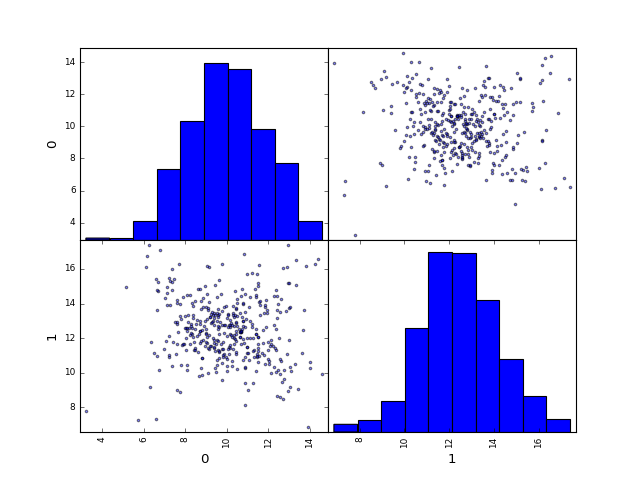

<IPython.core.display.Javascript object>


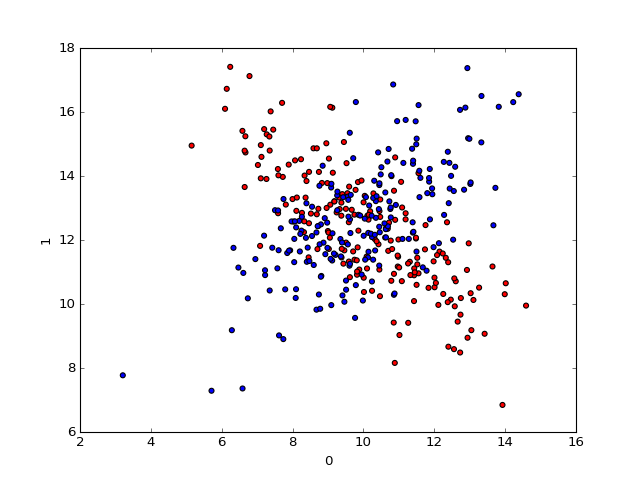

In [3]:
scatter_matrix(data_set[[0,1]])
plt.show()

cmap = {0.0: 'red', 1.0: 'blue'}
data_set.plot(x=0, y=1, kind='scatter',
             c=[cmap.get(c, 'black') for c in data_set[2]])

# Observaciones: